# Who's Who in our Customer Database?

## An Exercise in Unsupervised Learning

We begin our analysis by loading the requisite packages. In this instance, we need only the `tidyverse` suite of packages and `caret`, R's machine learning library. 

In [6]:
install.packages("tidyverse")
install.packages("caret")
library(tidyverse)
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In the cells that follow, we load our data and inspect its dimensions.

In [9]:
df = read_csv("data/AirlinesCluster.csv")

Rows: 3999 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): Balance, QualMiles, BonusMiles, BonusTrans, FlightMiles, FlightTran...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The display shows us that our data frame contains 3999 rows and 7 columns (i.e., features). 

In [4]:
dim(df)

[1] 3999    7

Below, we examine the top of our data frame by calling the `head()` function. Note that the scale of the variables differs substantially from one column to the next. This suggests further analytics will require normalization. 

In [10]:
head(df)

Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28143,0,174,1,0,0,7000
19244,0,215,2,0,0,6968
41354,0,4123,4,0,0,7034
14776,0,500,1,0,0,6952
97752,0,43300,26,2077,4,6935
16420,0,0,0,0,0,6942


If we summarize the data we can see that 1) there are no NA's and 2) BonusTrans and FlightTrans have the lowest means, while Balance and BonusMiles have the largest maximum values. The spread between these minima and maxima strengthen our case for data normalization.

In [12]:
summary(df)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

Below, we normalize our data, so that we can use it in cluster formation.

In [13]:
preproc = preProcess(df)
airlinesNorm = predict(preproc, df)

The mean of each vector below is zero. This confirms we have normalized data. 

In [14]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

Having successfully normalized our data, we can execute the hierarchical clustering commands and plot the resulting dendrogram. 

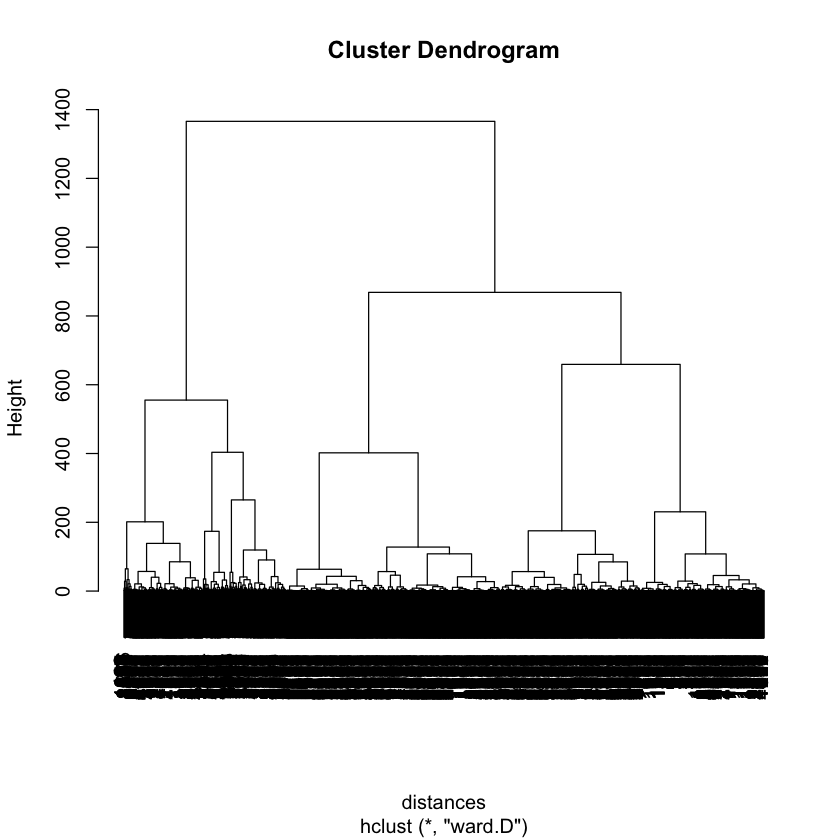

In [16]:
# prep for hierarchical clustering
distances = dist(airlinesNorm, method="euclidean")

# perform clustering
hierClust = hclust(distances, method="ward.D")

# plot dendrogram
plot(hierClust)

With dendrogram and domain knowledge in hand, we decide that 5 clusters is sufficient to capture the variance of the data.

In [18]:
# divide data into 5 clusters per intel from marketing
clusterGroups = cutree(hierClust, k=5)

# display clusters and number of observations
table(clusterGroups)

clusterGroups
   1    2    3    4    5 
 776  519  494  868 1342 

Having split the data into clusters, we can now dive into the data and search for meaningful patterns. We'll use the raw data for this section, as it is easier to interpret. 

In [32]:
# split raw data into clusters and calculate column means
lyst = lapply(split(df, clusterGroups), colMeans)

Cluster 1 has the highest DaysSinceEnroll, but low relative FlightTrans and FlightMiles.
The clientele in this cluster are infrequent but loyal customers who have been with the airline a long time.

In [36]:
lyst[1]

$`1`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   5.786690e+04    6.443299e-01    1.036012e+04    1.082345e+01    8.318428e+01 
    FlightTrans DaysSinceEnroll 
   3.028351e-01    6.235365e+03

Cluster 2 has the most Qualifying Miles, Flight Miles, and Flight Transactions
These customers are road warriors have accumulated a large number of miles and boast the largest number of Flight Transactions.


In [37]:
lyst[2]

$`2`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.106693e+05    1.065983e+03    2.288176e+04    1.822929e+01    2.613418e+03 
    FlightTrans DaysSinceEnroll 
   7.402697e+00    4.402414e+03

Cluster 3 has large relative balances in the Balance, BonusMiles, and BonusTrans categories.
These customers have accumulated a large number of miles through non-flight transactions.

In [24]:
lyst[3]

$`3`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   1.981916e+05    3.034615e+01    5.579586e+04    1.966397e+01    3.276761e+02 
    FlightTrans DaysSinceEnroll 
   1.068826e+00    5.615709e+03

Cluster 4 seems fairly unremarkable given its low values across all features.
These are likely new customers accumulating miles via non-flight transactions.

In [25]:
lyst[4]

$`4`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   52335.913594        4.847926    20788.766129       17.087558      111.573733 
    FlightTrans DaysSinceEnroll 
       0.344470     2840.822581

Cluster 5's output suggests these are fairly new customers who fly very little.

In [31]:
lyst[5]

$`5`
        Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   3.625591e+04    2.511177e+00    2.264788e+03    2.973174e+00    1.193219e+02 
    FlightTrans DaysSinceEnroll 
   4.388972e-01    3.060081e+03

The data we have inspected is perfectly acceptable, however, it is a bit rough on the eyes. We can run k-means clustering on our data and produce more reader-friendly output.

In [40]:
set.seed(88)

kmeansClust = kmeans(df, centers=5, iter.max=1000)

# clusters 4 & 5 seem interesting, given both are the only ones with over 1000 observations
table(kmeansClust$cluster)


   1    2    3    4    5 
  22  106  440 2336 1095 

Note that the cluster and observation numbers above are different from hierarchical clustering, as the assignment of cluster numbers is somewhat arbitrary.

Below, we have data that are based on the same input as above, but were calculated using the kmeans algorithm. Because of the numbering issue mentioned above, our generalizations about each group will change. For example, cluster 2 was initially our cluster of "road warriors." It is now cluster 1.

In [41]:
# review clusters
kmeansClust$centers

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
1,884040.64,605.90909,56643.136,21.636364,1945.1364,6.7727273,6247.773
2,389711.50,390.01887,51653.019,19.830189,1409.0472,4.4622642,5882.321
3,186467.78,251.00000,35467.236,17.722727,1002.7545,2.7227273,4972.057
4,23991.14,95.81507,7809.135,8.371147,239.5497,0.7470034,3716.071
5,87200.24,171.12146,25564.519,15.036530,590.6950,1.7607306,4420.725
